In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from astropy.io.votable import parse_single_table

In [28]:
#GOODS SOUTH STAR CHART within 100 arcmin, ordered by magnitude; downloaded using ASQL from GAIA DR3
table = parse_single_table("CANDLES2")
CANDLES=table.array

ra=[] #Right Ascension
dec=[] #Declination
mag=[] #Magnitude
ra_error = []
dec_error = []

for i in CANDLES[:]:    #Converts all mag, ra, and dec into floats from strings
    if i[2] != '':  #Some observations do not have a magnitude; so these are ignored
        if float(i[69]) < 16: #Faint stars of mag 16 and above are ignored (too faint for AO NGS)
            mag.append(float(i[69])) 
            ra.append(float(i[5])) 
            dec.append(float(i[7]))
            #ra_error.append(float(i[6]))
            #dec_error.append(float((i[8])))

# order=np.argsort(mag) #We want to have our ra, dec, and mags in order of faintest to brightest
# #This is done for graphical purposes; fainter stars (graphically smaller) are plotted over brighter ones
# mag=np.asarray(mag)[order]
# ra=np.asarray(ra)[order]    
# dec=np.asarray(dec)[order]    
# ra_error=np.asarray(ra_error)[order]
# dec_error=np.asarray(dec_error)[order]

scales=[] #Need scale values for the markersize of each star on a scatter plot to illustrate magnitude

# for i in mag: #Linear with intensity from 16, by converting back to intensity.
#     I = 10**((16-i)/2.5)
#     scales.append(I/10)

for i in mag: #Linear with magnitude from 16, i.e mag 12 star has marker size 2 times larger than a mag 14 star.
    I = (18-i)
    scales.append(I*15)
    


In [29]:
def stereographic(ra,dec,ra0,dec0): #Converts ra and dec (in rad) to x and y on a gnomonic projection plane around ra0 and dec0
    k=1/(1+np.sin(dec0)*np.sin(dec)+np.cos(dec0)*np.cos(dec)*np.cos(ra-ra0))
    
    x=k*np.cos(dec)*np.sin(ra-ra0)
    y=k*(np.cos(dec0)*np.sin(dec)-np.sin(dec0)*np.cos(dec)*np.cos(ra-ra0))
    return x,y

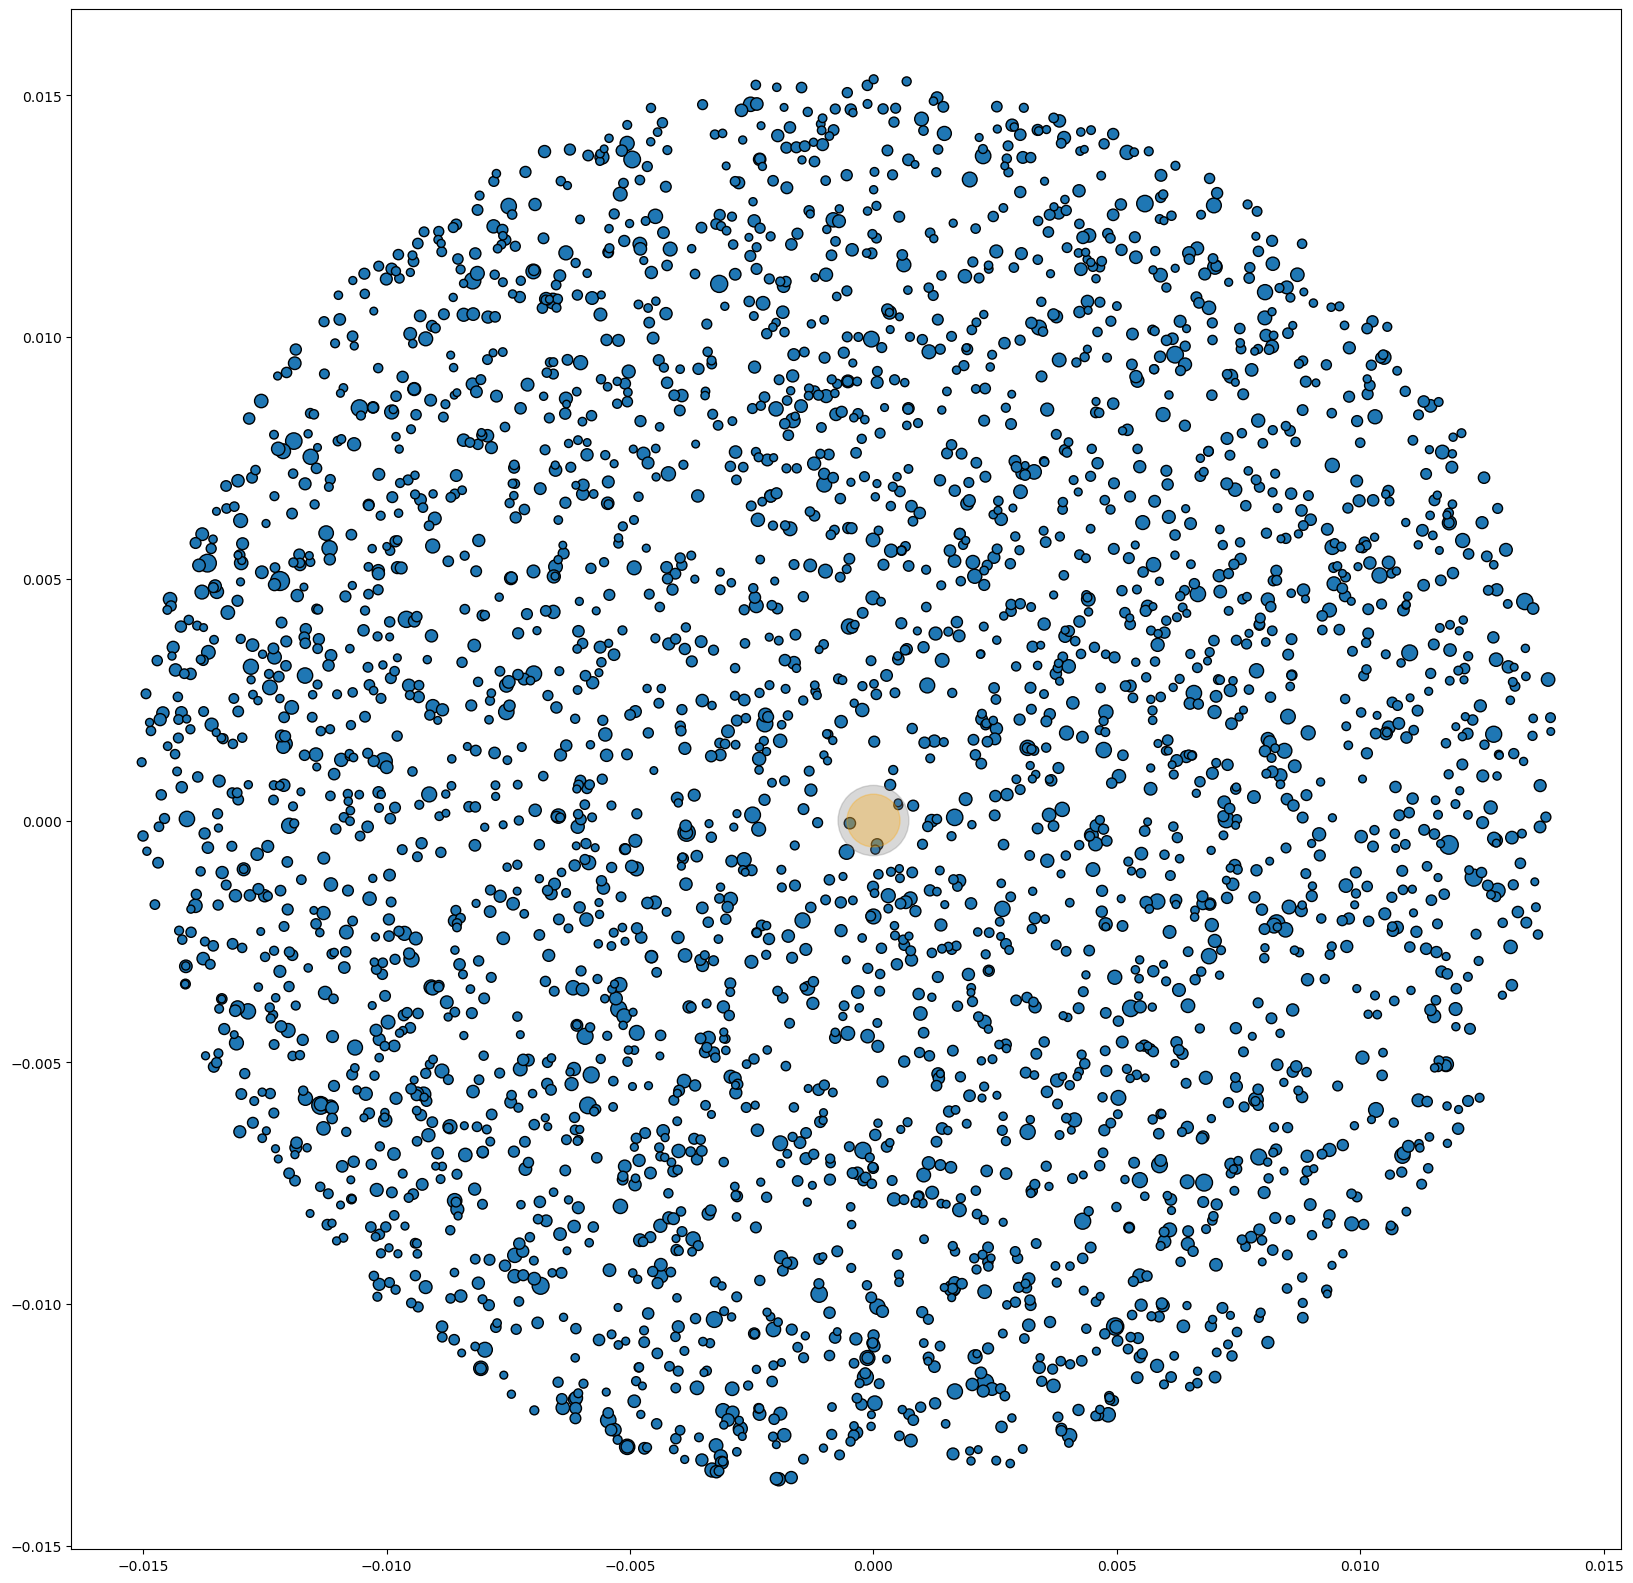

In [33]:
ra0=54.1#Projection axis ra value / centre of FOV
dec0=-27.8 #Projection axis dec value / centre of FOV
ra0,dec0=53.16571426,-27.89375114
techFOV = 10 #Technical field FOV in arcmin
scienceFOV = 7.5 #Science field FOV in arcmin

ra0_rad=np.radians(ra0) #Turns ra0 into radians
dec0_rad=np.radians(dec0) #Turns dec0 into radians

x=[] #x-coords of stars on gnomonic projection plane
y=[] #y-coords of stars on gnomonic projection plane
for i in range(0,len(ra)): #Takes every ra and dec value for the file and turns them into x and y under projection
    xval,yval=stereographic(np.radians(ra[i]),np.radians(dec[i]),ra0_rad,dec0_rad) #Angles need to be in radians
    
    x.append(xval)
    y.append(yval)
    

void,techFOV_radius=stereographic(ra0_rad,dec0_rad+np.radians(techFOV/2/60),ra0_rad,dec0_rad) #Calculates radius of the 10' FOV on the plane
void,scienceFOV_radius=stereographic(ra0_rad,dec0_rad+np.radians(scienceFOV/2/60),ra0_rad,dec0_rad)

#Plot of stars and FOVs
fig, ax = plt.subplots(figsize=(20,20))
plt.scatter(x,y,s=scales,edgecolors='black')

FOV_techfield = plt.Circle((0,0), techFOV_radius, color='gray', alpha=0.3) #Technical field FOV
FOV_sciencefield = plt.Circle((0,0), scienceFOV_radius, color='orange', alpha=0.3) #Science field FOV
ax.add_patch(FOV_techfield)
ax.add_patch(FOV_sciencefield)


In [34]:
# STARS WITHIN FOV

def distance(x,y): #Distance between FOV centre (0,0) and (x,y):
    d = np.sqrt(x**2+y**2)
    return d

sciencestars_index= [] #Index of stars inside science field
techstars_index = [] #Index of stars inside technical field and not in science field

for i in range(0,len(x)): #Retrieves indexes of stars within the radii.
    if distance(x[i],y[i]) < techFOV_radius:
        if distance(x[i],y[i]) < scienceFOV_radius:
            sciencestars_index.append(i)
        else:
            techstars_index.append(i)
    

print("Stars in FOV = "+str(len(techstars_index)+len(sciencestars_index)))
print("Stars in annulus = "+str(len(techstars_index)))
print("Stars in science field = "+str(len(sciencestars_index)))

Stars in FOV = 5
Stars in annulus = 3
Stars in science field = 2


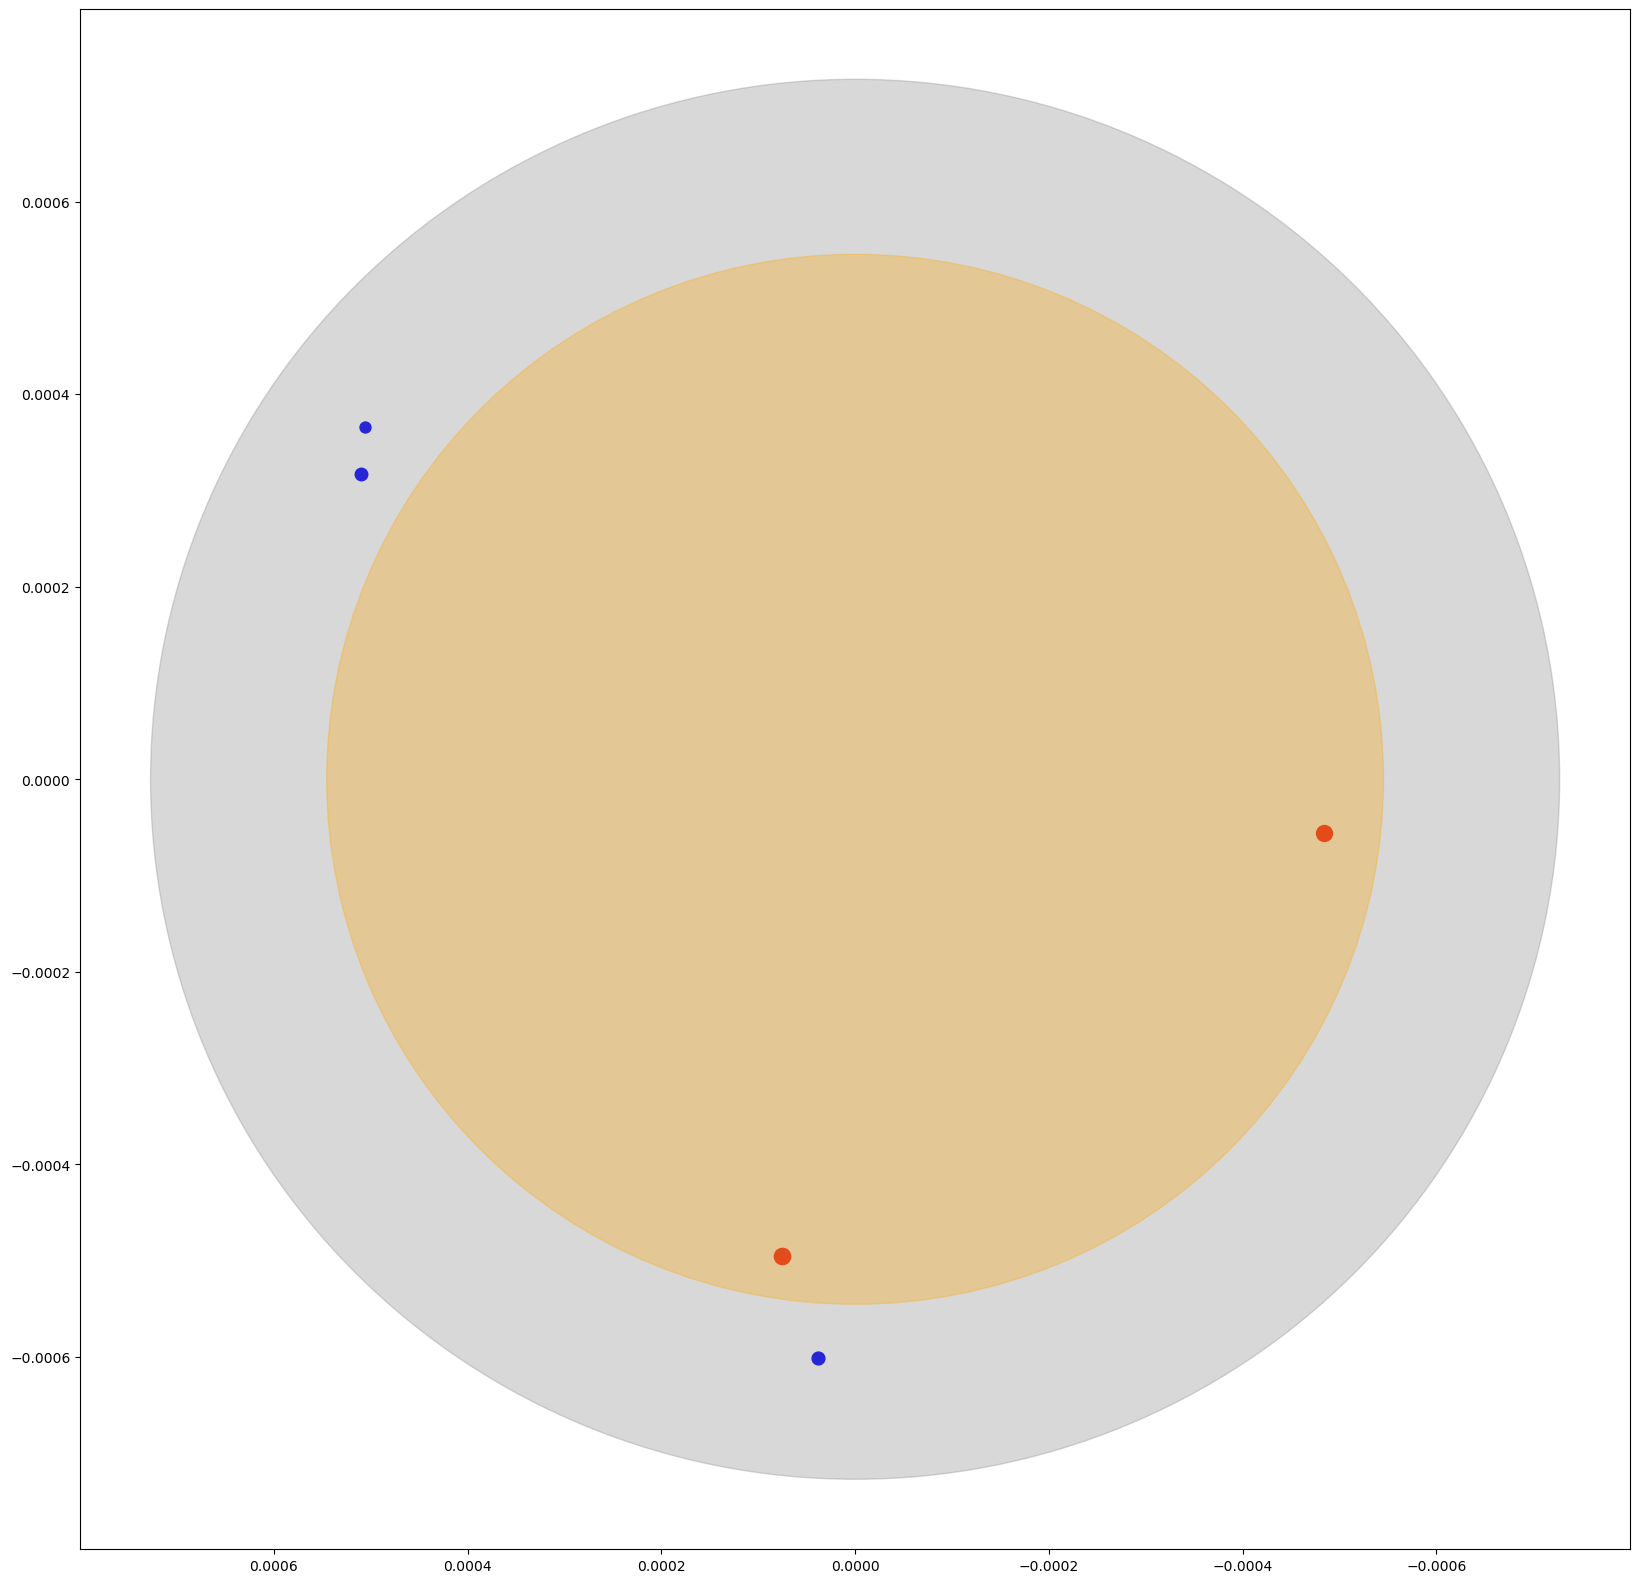

In [35]:
fig, ax = plt.subplots(figsize=(20,20))

for i in techstars_index:
    plt.scatter(x[i],y[i],s=scales[i]*2,color='blue')
for i in sciencestars_index:    
    plt.scatter(x[i],y[i],s=scales[i]*2,color='red')
    
FOV_techfield = plt.Circle((0,0), techFOV_radius, color='gray', alpha=0.3) #Technical field FOV
FOV_sciencefield = plt.Circle((0,0), scienceFOV_radius, color='orange', alpha=0.3) #Science field FOV
ax.add_patch(FOV_techfield)
ax.add_patch(FOV_sciencefield)

plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()

In [36]:
for i in techstars_index:
    print(mag[i])

15.159991264343262
15.280126571655273
15.921266555786133


In [23]:
for i in sciencestars_index:
    print(mag[i])

12.709394454956055
13.287272453308105
13.70879077911377
14.418876647949219
14.464962005615234
15.361967086791992
15.775514602661133
16.95244789123535
17.02084732055664
17.158920288085938
17.370298385620117
17.510576248168945
17.518291473388672
17.536840438842773
